# Project: Investigate a Medical Appointment Dataset
___

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Limitations">Analysis Shortcoming & Data Limitations</a>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

___


<a id='intro'></a>
## Introduction

> 110,526 medical appointments its 14 associated variables (characteristics). The most important attribute is the last, if the patient show-up or no-show to the appointment. What is the use of this? 

> This will help us to know the relationships affecting people not attending and thus avoiding these problems in the future, which will increase the percentage of people who attend and do not miss their appointments, this costs a lot of time, there is a very high percentage of people who attend compared to people who do. The doctor cancels his important appointments for a particular patient, and in the end this patient does not come, so all this time is wasted.

> Also What if that possible to predict someone to no-show an appointment?

In [1]:
# Import pandas and matplotlib
import pandas as pd
%matplotlib inline

___
<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load My data and print out a first 5 rows
df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**It seems that "PatientId" column isn't in the right format.**
**Also "No_show" column may be misunderstood**

**I can't use query function with column called "No-Show" because "-" in the name, so i will rename it.**

Let's check volume (shape) of the data :

In [3]:
df.shape 

(110527, 14)

**Let's check type of attributes and see if we will change some of it:**

In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

**"PatientId" is float !**

Check type of 'No-show' column

In [5]:
type(df['No-show'][0]) 

str

Check type of 'ScheduledDay' column

In [6]:
type(df['ScheduledDay'][0])

str

Check type of 'AppointmentDay' column

In [7]:
type(df['AppointmentDay'][0])

str

#### Check Null columns

In [8]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

no null values

#### Check Duplicated columns

In [9]:
sum(df.duplicated())

0

No Duplicates

#### Check Unique values and the range of the values in columns

In [10]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [11]:
df["Neighbourhood"].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [12]:
df['AppointmentDay'].unique() 

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

**The time in Appointment Day is dublicated and it is not important !**

In [13]:
df['Handcap'].unique() 

array([0, 1, 2, 3, 4])

**"Handcap" should be true or false !**

In [14]:
df['No-show'].unique() 

array(['No', 'Yes'], dtype=object)

In [15]:
df['No-show'].value_counts() 

No     88208
Yes    22319
Name: No-show, dtype: int64

**There is a large number of patients who book appointments who do not show up, which is a quarter of the percentage of patients.**

Let's examine the structure of the entire data. ant take summary statistics for the numerical features.

In [17]:
df.loc[:,"Age":].describe() # not include ids

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


1- **There's negative values in "Age" column.** <br>
2- The mean of Age is 37 which is strange ! <br>
3- Handcap has values bigger than 1 !

Check range of negative values by plot Age distribution :

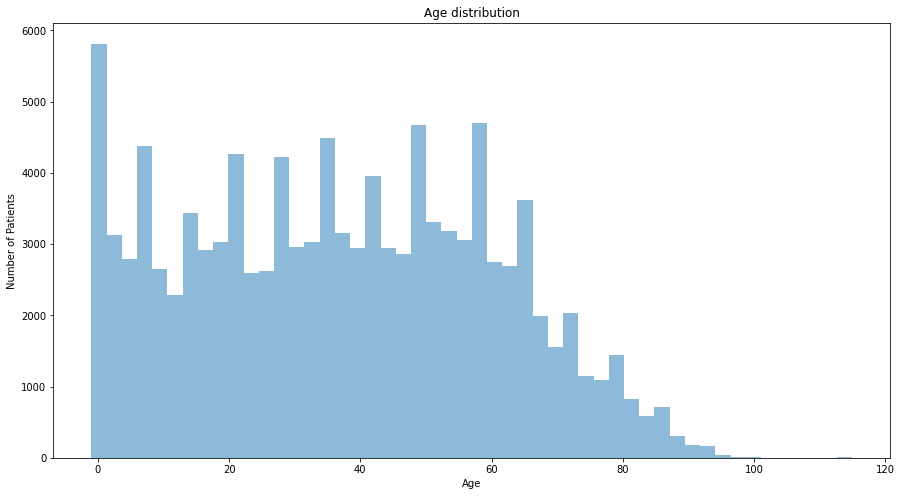

In [18]:
AgePlot = df.Age.plot(kind="hist",figsize=(15,8),bins=50,alpha=0.5);
AgePlot.set_xlabel('Age');
AgePlot.set_ylabel('Number of Patients');
AgePlot.set_title('Age distribution');

**There is some ages fewer than zero !**

In [19]:
print(sorted(df["Age"].unique()))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


**Negative Value in "Age" Column!**

***

## **Problems in the Dataset :**

##### 1- "PatientId" column is float
##### 2- "No-show" column may be misunderstood, and **I can't make query with column called "No-Show" because "-" in the name.**
##### 3- "Age" column has negative value
##### 4- "Handcap" should be true or false
##### 5- The time in Appointment Day is not important

***

### Data Cleaning

#### 1- Change Type of pitient id from float to int

Change "PatientId" from float to int.

In [20]:
# Change "PatientId" from float to int
df['PatientId'] = df['PatientId'].astype(int) 

#### 2- Rename "No-show" column to "Show" and change values

Display unique values for "No-show" column.

In [21]:
# Display unique values for "No-show" col
df["No-show"].unique()

array(['No', 'Yes'], dtype=object)

Rename "No-show" to "show" and reverse values

In [22]:
# Rename "No-show" to "show"
df.rename(columns={'No-show': 'Show'}, inplace=True)
df = df.replace({'Show': {'Yes': 0, 'No': 1}}) #reverse values

In [23]:
# Display unique values for "Show" col
df["Show"].unique()

array([1, 0])

**Good !**

#### 3- Remove negative values and zeros from Age columns

In [24]:
df = df[df['Age'] >= 0] # take only rows has age above or equal 0
sum(df['Age'] < 0) # Check

0

#### 4- "Handcap" must be true or false

In [25]:
# count of every value in Handcap
df['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [26]:
df = df.replace({'Handcap': {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}}) # replace values bigger than zero by 1

In [27]:
df['Handcap'].value_counts()

0    108285
1      2241
Name: Handcap, dtype: int64

**Good !**

#### 5- The time in Appointment Day is not important

In [28]:
# clear time in Appointment Day
df["AppointmentDay"] = df["AppointmentDay"].apply(lambda x: x[0:10])


In [29]:
df["AppointmentDay"].head()

0    2016-04-29
1    2016-04-29
2    2016-04-29
3    2016-04-29
4    2016-04-29
Name: AppointmentDay, dtype: object

#### 6- Split ScheduledDay to ScheduledDate and ScheduledTime

In [30]:
df["ScheduledDay"].head()

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object

In [31]:
# Split 2 columns
df["ScheduledDate"] = df["ScheduledDay"].apply(lambda x: x[:10])
df["ScheduledTime"] = df["ScheduledDay"].apply(lambda x: x[11:-1])

In [32]:
# Drop the original column
df.drop(columns=["ScheduledDay"], inplace=True)

### Last veiw before Exploration :

In [33]:
df.head() 

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,ScheduledDate,ScheduledTime
0,29872499824296,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,18:38:08
1,558997776694438,5642503,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,16:08:27
2,4262962299951,5642549,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,16:19:04
3,867951213174,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,17:29:31
4,8841186448183,5642494,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,16:07:23


**Good !**

#### Save version of cleaned Data

In [34]:
# save Dataset after cleaning
df.to_csv('df_edited.csv', index=False)

#### Before exploration, split data to Presence and absence

In [35]:
df_S = df.query("Show == 1")
df_N = df.query("Show == 0")
df_S.head()

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,ScheduledDate,ScheduledTime
0,29872499824296,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,18:38:08
1,558997776694438,5642503,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,16:08:27
2,4262962299951,5642549,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,16:19:04
3,867951213174,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,17:29:31
4,8841186448183,5642494,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,16:07:23


<a id='eda'></a>
## Exploratory Data Analysis

Function to graph bar to avoid repetitive code:

In [36]:
def graphBar(df,clr):
        df.value_counts().plot(kind="bar",color=clr,alpha=0.3);

### Question 1 : What factors are important in order to predict if a patient will show up for their scheduled appointment?

**This question is the main question that we want to answer and that the data has been collected to answer, our answer to this question and the analysis of the data we have will help us increase the percentage of patients who adhere to their medical appointments.**

___

**First, Let's take overview and check on distribution and ranges of columns.**

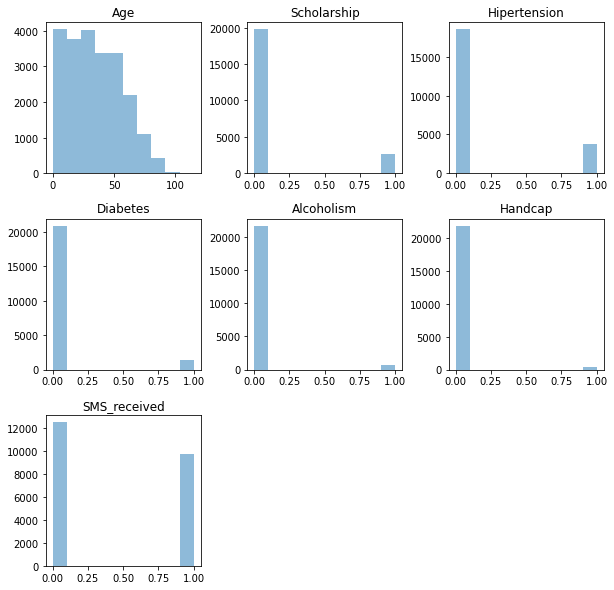

In [37]:
df_N.iloc[:,2:-3].hist(figsize=(10,10),grid=False,alpha=0.5);

The percentage of "Handcap" columns which has true value is vary small comparing with which has false value, that reduce from important and impact of this attribute. same as "Scholarship", "Hipertension", "Diabetes" and "Alcoholism".

**Plot Age distribution to know its range and outliers**

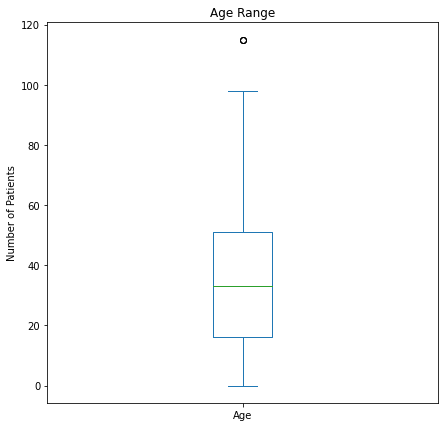

In [38]:
# plot Age to know its range
BoxAge = df_N["Age"].plot(kind="box",figsize=(7,7));
BoxAge.set_ylabel('Number of Patients');
BoxAge.set_title('Age Range');

Most of peaple is smaller than 60 years old, the range between 0 and 115, the imortan thig that there are outliers, let's check it

**Check outliers, patient bigger then 100 years old**

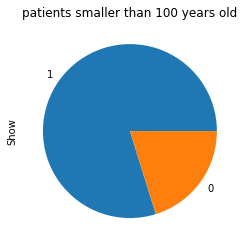

In [39]:
# Check outliers impact
pieAgeOld = df.query("Age < 100").Show.value_counts().plot(kind="pie");
pieAgeOld.set_title("patients smaller than 100 years old");

**Compare the above plot with attendance of patient smaller than 100 years old**

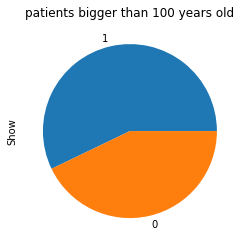

In [40]:
# Find outliers impact
pieAgeOld = df.query("Age > 100").Show.value_counts().plot(kind="pie");
pieAgeOld.set_title("patients bigger than 100 years old");

<h4>It seems that Older people are less likely to show up for appointments, maybe because they're dead?</h4>

Let's see if the ScheduledDate has impact on attend or not.

,ScheduledDate
count,110526
unique,111
top,2016-05-03
freq,4238


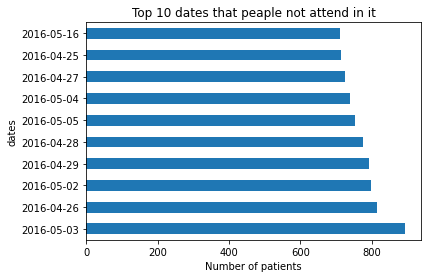

In [41]:
# plot top 10 dates that peaple not attend in it
datesBar = df_N["ScheduledDate"].value_counts()[0:10].plot.barh();
datesBar.set_title("Top 10 dates that peaple not attend in it");
datesBar.set_xlabel("Number of patients");
datesBar.set_ylabel("dates");
pd.DataFrame(df['ScheduledDate'].describe())

The top day that peaple not attend on it is (2016-05-03), and April and may months is the most months peaple not attend on it.

**Split months from date to make some statistics on it, we need to know impact of month on attendance of paeple :**

In [42]:
# extract month from ScheduledDate for attend persons
df_month_S = df_S["ScheduledDate"].str.split("-").apply(lambda x: int(x[1]))
# extract month from ScheduledDate for abscent persons
df_month_N = df_N["ScheduledDate"].str.split("-").apply(lambda x: int(x[1]))

**Check the attendance and abscence in months :**

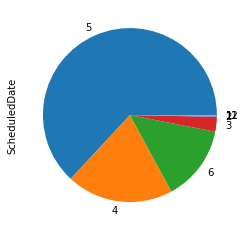

In [43]:
df_month_S.value_counts().plot.pie();

May is the most month has attendance

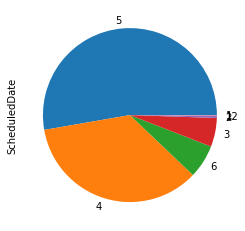

In [44]:
df_month_N.value_counts().plot.pie();

#### In April, people miss their appointments more than usual
#### In June and july, people attend their appointments more than usual

#### Check if there is relation between Scheduled Date and Appointment Day

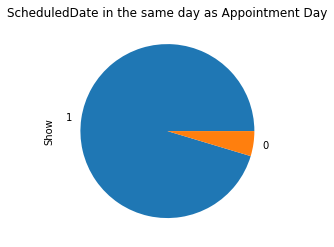

In [45]:
df_fastApp_e = df[df["ScheduledDate"] == df["AppointmentDay"]]
piePlot = df_fastApp_e.Show.value_counts().plot(kind="pie");
piePlot.set_title("ScheduledDate in the same day as Appointment Day");

**The percentage of people not attend when Scheduled Date and Appointment Day is in the same day is vary low, the most of people attend, let's check if not.**

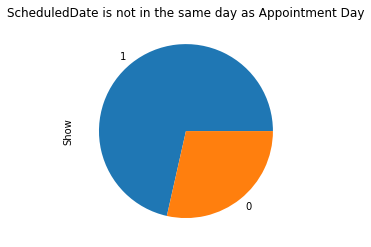

In [46]:
df_fastApp_n = df[df["ScheduledDate"] != df["AppointmentDay"]]
piePlot = df_fastApp_n.Show.value_counts().plot(kind="pie");
piePlot.set_title("ScheduledDate is not in the same day as Appointment Day");

The percentage of people not attend when Scheduled Date and Appointment Day is not in the same day is big comparing with when Scheduled Date and Appointment Day is not in the same day.

<h4>Booking the appointment on the same day has a good effect on attending the appointment.</h4>

___

### Question 2 : What factors are important to know what make peaple make an appointment
**It is important to know the factors affecting booking appointments, what causes people to book appointments and what factors prevent them from doing that, that will help us to make the necessary decisions that make people book their appointments**

___

Let's check Gender distribution

Gender
F    71839
M    38687
Name: PatientId, dtype: int64

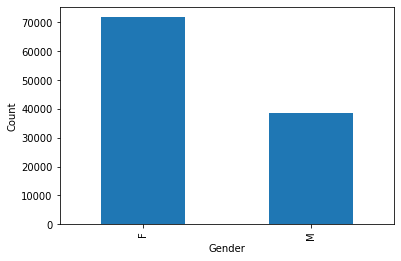

In [47]:
df.groupby(["Gender"])["PatientId"].count().plot(kind="bar").set_ylabel('Count')
df.groupby(["Gender"])["PatientId"].count()

The females is larger than males

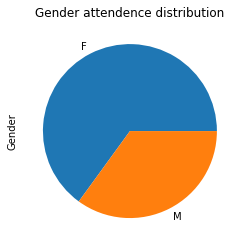

In [48]:
# See who is most attend
Gen = df['Gender'].value_counts().plot(kind="pie");
Gen.set_title("Gender attendence distribution");

#### Females books more appointments than males.

Check Age distribution and discribe people

,Age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


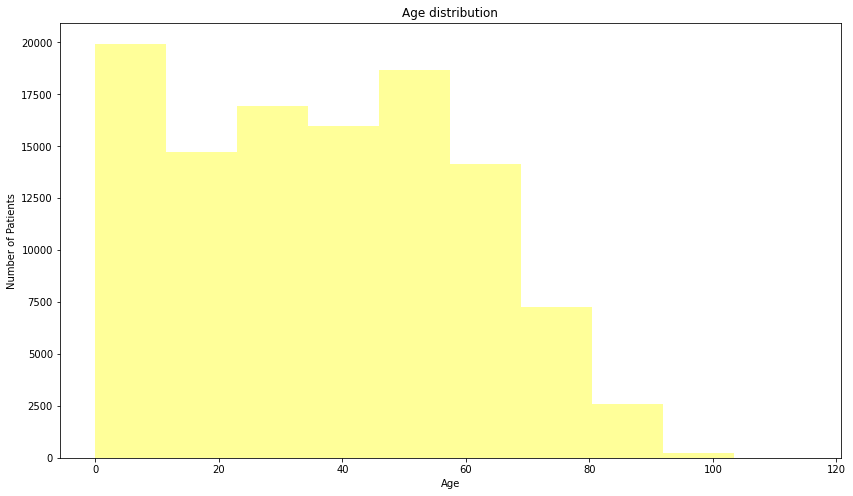

In [49]:
# plot Age histogram
his = df['Age'].plot(kind="hist",color="yellow",alpha=0.4,figsize=(14,8));
his.set_ylabel('Number of Patients');
his.set_xlabel('Age');
his.set_title('Age distribution');
pd.DataFrame(df['Age'].describe())

The distribution is skewed to right,which means there is many childs who have appointments, also the older petient is less booked for appointments.

<h4>Young people are the most booked for appointments</h4>

Let's check the impact of Neighbourhood and location of patient on booking appointment.

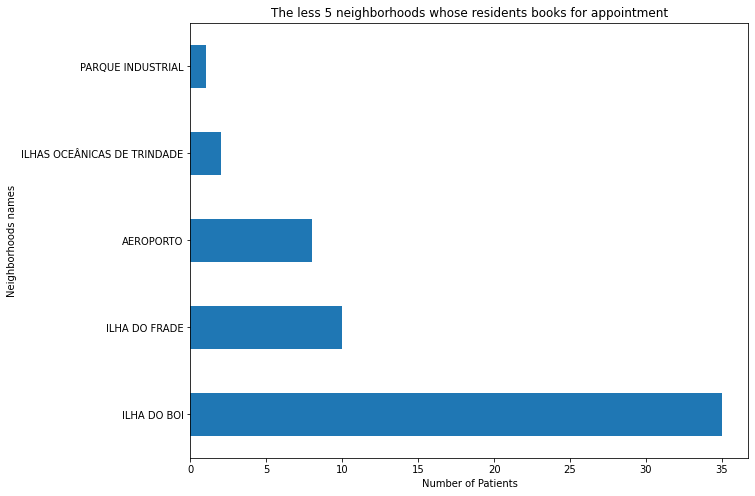

In [50]:
neigh = df.Neighbourhood.value_counts()[-5:].plot.barh(figsize=(10,8));
neigh.set_ylabel('Neighborhoods names');
neigh.set_xlabel('Number of Patients');
neigh.set_title('The less 5 neighborhoods whose residents books for appointment');

In [51]:
print(f"The less 5 neighborhoods whose residents books for appointment: \n")
for word in df.Neighbourhood.unique()[-5:] :
    print(f"{word}")

The less 5 neighborhoods whose residents books for appointment: 

FRADINHOS
NAZARETH
AEROPORTO
ILHAS OCEÂNICAS DE TRINDADE
PARQUE INDUSTRIAL


Maybe because this neighborhoods is far from the location of appointment location

___

<a id='Limitations'></a>
## Analysis Shortcoming & Data Limitations

> **1. There are many columns that has false and true value, that make the analysis is more harder and prevent many plots that can make.**

> **2- The form of time and date columns make the data hard to analysis it and plot it.**

> **3- The strange age distribution, as the young people and their need for care and going to medical appointments are less than the needs of the elderly, and this is contrary to what we find in the data, also the average age is equal to 37 years, which is a young age to contract diseases and does not reflect the distribution of ages that we have well.**

> **4- big precent of people do not have a disability, which makes the impact of "Handcap" value very small and useless, the same problem in "Scholarship", "Hipertension", "Diabetes" and "Alcoholism".**

___

<a id='conclusions'></a>
## Conclusions

> ### 1 - 20% of people do not attend their appointments, which indicates the extent and impact of this problem.

> ### 2 - Older people are less likely to show up for appointments, maybe because they're dead? 

> ### 3 - people miss their appointments more than usual in April and In June and july, people attend their appointments more than usual.

> ### 4 - Reserving the appointment on the same day has a good effect on attending the appointment

> ### 5 - Females books more appointments than males.

> ### 6 - Young people are the most booked for appointments

> ### 7 - The less Five neighborhoods whose residents book for appointment: 

**1- FRADINHOS <br>
2- NAZARETH <br>
3- AEROPORTO <br>
4- ILHAS OCEÂNICAS DE TRINDADE <br>
5- PARQUE INDUSTRIAL <br>**

___